# Importing Libraries

In [1]:
import numpy as np
import pandas as pd

# Reading Data

In [2]:
df=pd.read_csv('Fraud.csv')
# Shape the data
df.shape

(6362620, 11)

# Data Pre-processing

In [3]:
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [4]:
df.tail(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


# Data Analysis

1. Data cleaning including missing values, outliers and multi-collinearity.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
df.isnull().values.any()

False

In [7]:
legit = len(df[df.isFraud == 0])
fraud = len(df[df.isFraud == 1])
legit_percent = (legit / (fraud + legit)) * 100
fraud_percent = (fraud / (fraud + legit)) * 100

print("Number of Legit transactions: ", legit)
print("Number of Fraud transactions: ", fraud)
print("Percentage of Legit transactions: {:.4f} %".format(legit_percent))
print("Percentage of Fraud transactions: {:.4f} %".format(fraud_percent))

Number of Legit transactions:  6354407
Number of Fraud transactions:  8213
Percentage of Legit transactions: 99.8709 %
Percentage of Fraud transactions: 0.1291 %


As the results show that the data is highly imbalanced. Percentage of the Legit transactions is 99.8%. So the data is highly imbalanced. So we will go for the Decision tree and the Random forest tree for it.

In [8]:
# Merchants
X = df[df['nameDest'].str.contains('M')]
X.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0,0
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0,0


# Visualising data for the Insights

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

## Correlation Heatmap

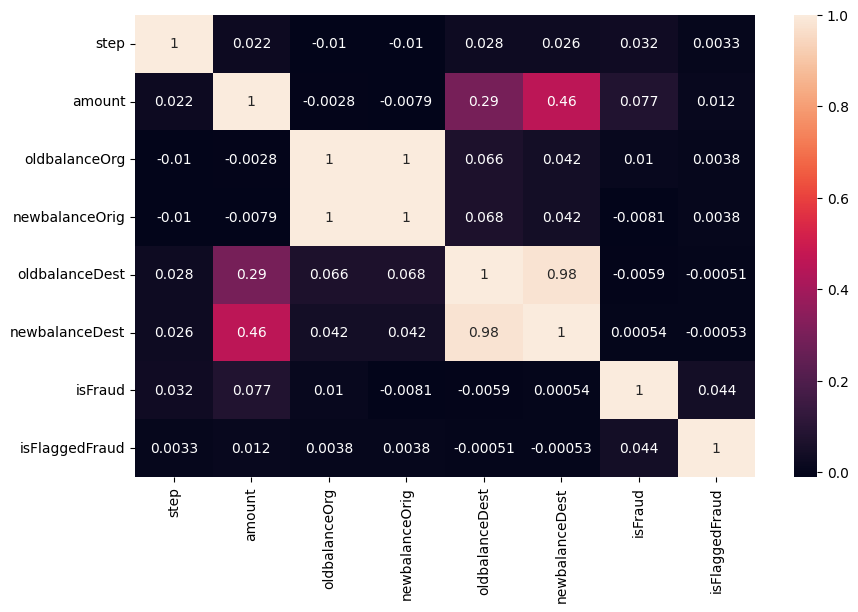

In [10]:
numeric_df = df.select_dtypes(include='number')
corr = numeric_df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True)
plt.show()


In [11]:
# No. of the legit anf frau transaction

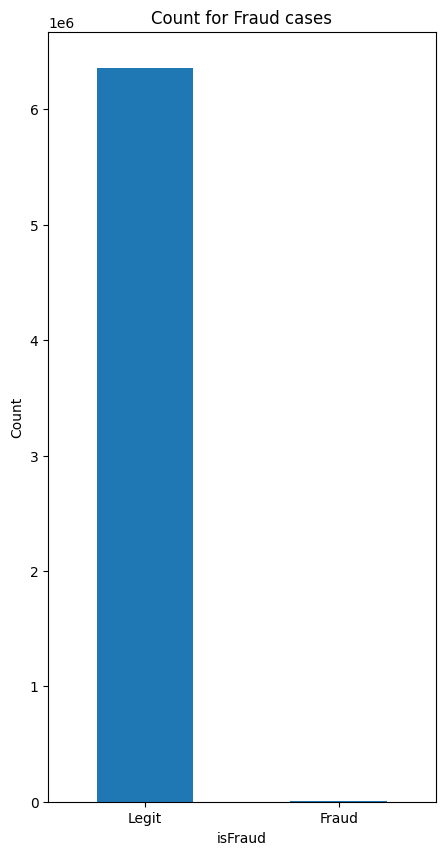

In [12]:
plt.figure(figsize=(5,10))
labels = ["Legit", "Fraud"]
count_classes = df.value_counts(df['isFraud'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Count for Fraud cases")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

In [13]:
#creating a copy of original dataset to train and test models
new_df=df.copy()
new_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


### Label encoding

In [14]:
# Checking how many attributes are dtype: object

objList = new_df.select_dtypes(include = "object").columns
print (objList)

Index(['type', 'nameOrig', 'nameDest'], dtype='object')


Here we have 3 attributes with object datatypes.Thus we need to label encode them in order to check multicolinearity.

In [15]:
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    new_df[feat] = le.fit_transform(new_df[feat].astype(str))

print (new_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int32  
 2   amount          float64
 3   nameOrig        int32  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        int32  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int32(3), int64(3)
memory usage: 461.2 MB
None


In [16]:
new_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,757869,170136.0,160296.36,1662094,0.0,0.0,0,0
1,1,3,1864.28,2188998,21249.0,19384.72,1733924,0.0,0.0,0,0
2,1,4,181.00,1002156,181.0,0.00,439685,0.0,0.0,1,0
3,1,1,181.00,5828262,181.0,0.00,391696,21182.0,0.0,1,0
4,1,3,11668.14,3445981,41554.0,29885.86,828919,0.0,0.0,0,0


## Multicolinearity

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(df):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

    return(vif)

calc_vif(new_df)

,variables,VIF
0,step,2.791610
1,type,4.467405
2,amount,4.149312
3,nameOrig,2.764234
4,oldbalanceOrg,576.803777
5,newbalanceOrig,582.709128
6,nameDest,3.300975
7,oldbalanceDest,73.349937
8,newbalanceDest,85.005614
9,isFraud,1.195305


As oldbalanceOrg and newbalanceOrig have too high VIF. High VIF(Variance Inflation Factor) values indicate multicollinearity between specific pairs of attributes, and we want to address this by combining them or dropping one of them.


In [18]:
new_df['Actual_amount_orig'] = new_df.apply(lambda x: x['oldbalanceOrg'] - x['newbalanceOrig'],axis=1)
new_df['Actual_amount_dest'] = new_df.apply(lambda x: x['oldbalanceDest'] - x['newbalanceDest'],axis=1)
new_df['TransactionPath'] = new_df.apply(lambda x: x['nameOrig'] + x['nameDest'],axis=1)

#Dropping columns
new_df = new_df.drop(['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','step','nameOrig','nameDest'],axis=1)

calc_vif(new_df)

,variables,VIF
0,type,2.687803
1,amount,3.818902
2,isFraud,1.184479
3,isFlaggedFraud,1.002546
4,Actual_amount_orig,1.307910
5,Actual_amount_dest,3.754335
6,TransactionPath,2.677167


<Axes: >

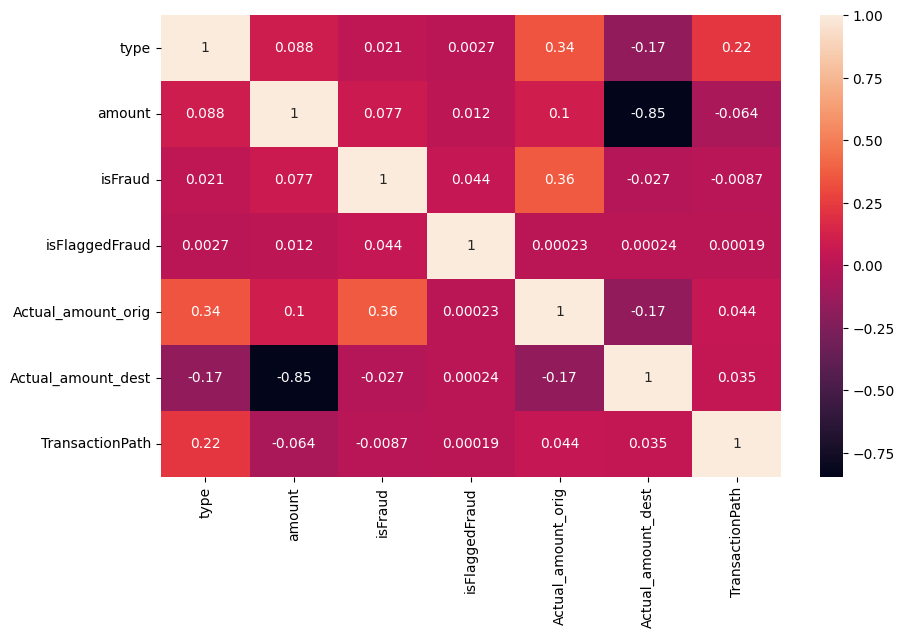

In [19]:
corr=new_df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)

# Buliding Model

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import itertools
from collections import Counter
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

## Normalizing Amount

In [21]:
# Perform Scaling
scaler = StandardScaler()
new_df["NormalizedAmount"] = scaler.fit_transform(new_df["amount"].values.reshape(-1, 1))
new_df.drop(["amount"], inplace= True, axis= 1)

Y = new_df["isFraud"]
X = new_df.drop(["isFraud"], axis= 1)

## Splitting the Dataset

In [22]:
# Split the data
(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, test_size= 0.2, random_state= 42)

print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (5090096, 6)
Shape of X_test:  (1272524, 6)


## Training Model

 ### Using Decision Tree

In [23]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

Y_pred_dt = decision_tree.predict(X_test)
decision_tree_score = decision_tree.score(X_test, Y_test) * 100

## Evaluation

In [25]:
# Print scores of our classifiers
print("Decision Tree Score: ", decision_tree_score)

Decision Tree Score:  99.92448079564707


In [26]:
# key terms of Confusion Matrix - Decision Tree
print("TP,FP,TN,FN - Decision Tree")
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_dt).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

TP,FP,TN,FN - Decision Tree
True Positives: 1158
False Positives: 499
True Negatives: 1270405
False Negatives: 462


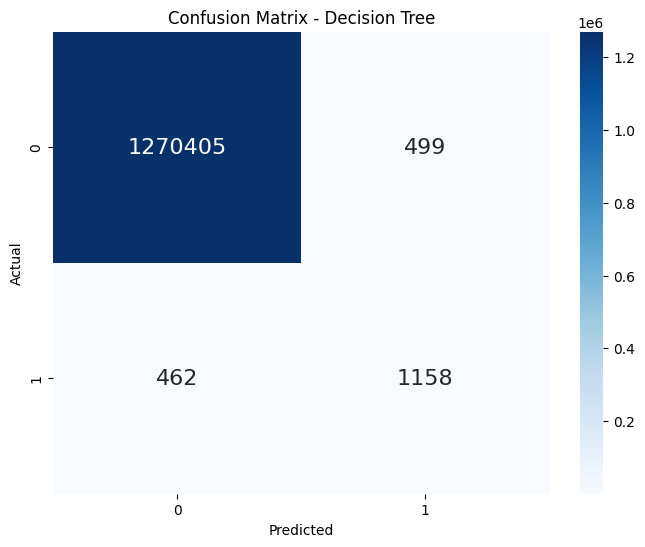

In [28]:
from sklearn.metrics import confusion_matrix
# Calculate Confusion Matrix
confusion_matrix_dt = confusion_matrix(Y_test, Y_pred_dt)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_dt, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Classification Report

In [29]:
# For Decision tree
classification_report_dt = classification_report(Y_test, Y_pred_dt)
print("Classification Report - Decision Tree")
print(classification_report_dt)


Classification Report - Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.70      0.71      0.71      1620

    accuracy                           1.00   1272524
   macro avg       0.85      0.86      0.85   1272524
weighted avg       1.00      1.00      1.00   1272524



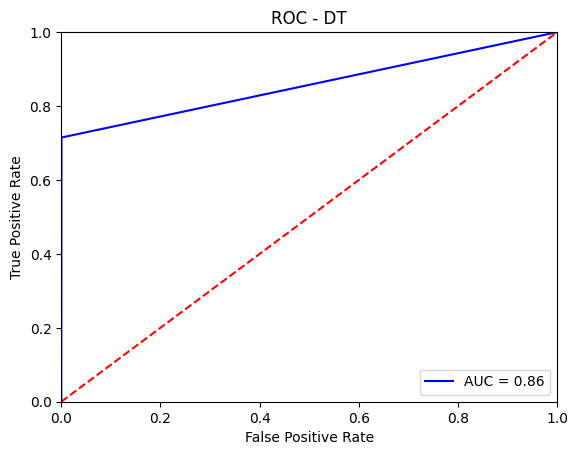

In [30]:
# AUC ROC - DT
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(Y_test, Y_pred_dt)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - DT')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


 The AUC (Area Under the Curve) of a ROC (Receiver Operating Characteristic) curve is a measure of the classifier's ability to distinguish between the positive and negative classes. A higher AUC indicates a better performance. Here AUC for the Decision tree is also high.

# Conclusion

As we can see the accuracy of the Decision tree is good(99.9%). I have preferred the decision tree as it provides more precision than other machine learning algorithms like Logistic regression, xgboost, etc.

Another reason is the highly unbalanced data (with Fraud: 99.87%) so a decision tree is preferred. We can also use random forest.

**Q2)** Describe your fraud detection model in elaboration.

Ans.
### Decision Tree Model for Fraud Detection:

Data Used: Same historical transaction data with labeled fraud instances.

Features: Similar features used as in the Random Forest model.

Preprocessing: Handled missing values, engineered features, and scaled numerical features.

Model Selection: Chose a Decision Tree for simplicity and interoperability.

Training: Split the dataset, trained the Decision Tree model on the training set.

Evaluation: Assessed performance using metrics like accuracy, precision, recall, F1-score, and ROC-AUC.
termine if they work?

**Q3)** How did you select variables to be included in the model?

Ans. Using VIF(Variance Inflation Factor) values and correlation heatmap,we can select variables to be included in the model. We need to check if there are any attributes highly correlated to each other and then drop one which is less correlated to the isFraud attribute.


**Q4)** Demonstrate the performance of the model by using best set of tools.

Ans. Here I have used the confusion matrix for the evaluation purpose which is the best tool for performance. THe Classification report is also shown.

**Q5)** What are the key factors that predict fraudulent customer?

Ans. Some key factors are as following that predict fraudlent customer:
i. Transection history
ii. Location 
iii. Source of request is secure or not.


**Q6)** Do these factors make sense? If yes, How? If not, How not?

Ans. Yes, this makes sense when I select the important highly correlated parameters for Fraud detection.

**Q7)** What kind of prevention should be adopted while company update its infrastructure?

Ans. 
1) Authentication and Authorization: 
Implement robust authentication mechanisms to ensure that only authorized users have access to the applicatio

2) Employ end-to-end encryption to protect sensitive data during transmission.
Regularly update encryption protocols to adhere to the latest security standards.


3) Regular Security Audits and Testing:
 Conduct regular security audits and vulnerability assessments to identify and address potential weaknesses.
Perform penetration testing to simulate cyber-attacks and uncover vulnerabilities in the application.
Use automated tools and manual testing to ensure a comprehensive security assessment.


4) Secure Coding Practices:
Train developers in secure coding practices to minimize the introduction of vulnerabilities during the development process.
Conduct code reviews and utilize static code analysis tools to identify and rectify security issues early in the development lifecycle.

5) Monitoring and Incident Response:
Implement real-time monitoring for suspicious activities, unauthorized access, and potential security breaches.
 threats and challenges.

**Q8)** Assuming these actions have been implemented, how would you determine if they work?

Ans. These actions have been implemented then we can determine by :

i. Customer keeping check of their account activity.

ii. Check for security

iii. Bank sending e-statement

iv. Proper feedback or messaging
   